# Team 11 - Survey Results Analysis

DAT5305 - Machine Learning

By Burcu Dogru, Mazhar Muzaffar Hussain Syed, Mubi Deborah Liliane Kigungu, Vi Nguyen

## Windows vs. Macbook

Our data from the survey results have been cleaned, scaled and transformed into clusters. We did so, in order to analyze and compare the differences between psychographic and behavioral questions in the survey results. The two sections were denoted as psychographic and Hult DNA throughout the document. For each set of data, we created clusters of the information in order to determine if there were changes in between personas of the individuals that have done the survey.

<h2>Code Preparation</h2><br>
Loading data and importing packages

In [1]:
# importing packages needed for PCA analysis
import numpy             as np                   # mathematical essentials
import pandas            as pd                   # data science essentials
import matplotlib.pyplot as plt                  # fundamental data visualization
import seaborn           as sns                  # enhanced visualization
from sklearn.preprocessing   import StandardScaler      # standard scaler
from sklearn.decomposition   import PCA                 # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering

# loading data
file = './datasets/survey_data.xlsx'

#reading file
survey_df = pd.read_excel(io = file)

# display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

#lowercasing the dataset
survey_df.columns = survey_df.columns.str.lower()

Now we will define the user functions needed for further analysis.

In [2]:
# scree_plot UDF
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./questions_screeplot.png')
        
    # displaying the plot
    plt.show()

# inertia UDF
########################################
def inertia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()

## Cleaning and Organizing Data

In this part we will check for the data distribution. Displaying only 9 of them to see give the of the distribution. 

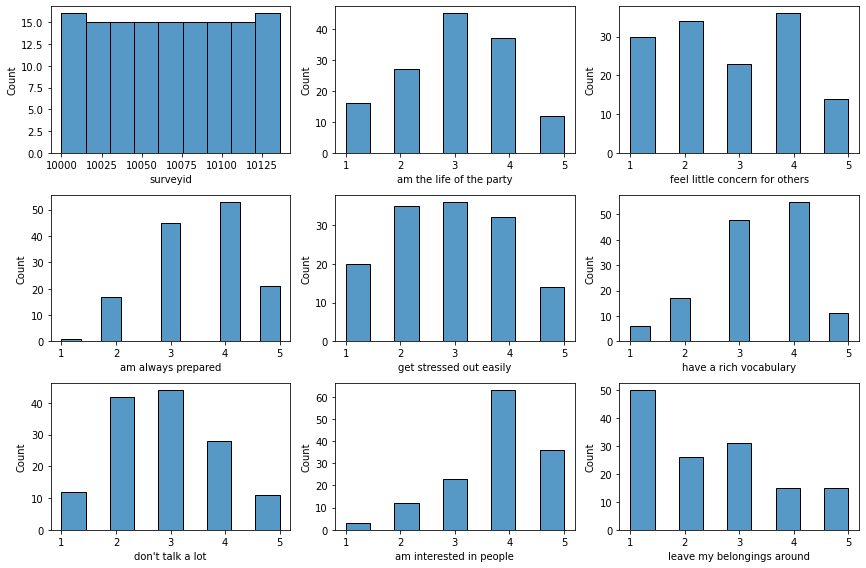

In [3]:
#looking at data distribution in histograms
#columns 0-9
# setting figure size
fig, ax = plt.subplots(figsize = (12, 8))

# initializing a counter
count = 0

# looping to create visualizations
for col in survey_df:

    # condition to break
    if count == 9:
        break
    
    # increasing count
    count += 1
    
    # preparing histograms
    plt.subplot(3, 3, count)
    sns.histplot(x = survey_df[col],)


# formatting, saving, and displaying the plot
plt.tight_layout()
plt.savefig('./survey_df_hist.png')
plt.show()

Data looks mainly normally distributed and therefore does not need log transformation of features 

In [4]:
# summary of decriptive statistics
survey_df.describe(include = 'number').round(decimals = 2)

,surveyid,am the life of the party,feel little concern for others,am always prepared,get stressed out easily,have a rich vocabulary,don't talk a lot,am interested in people,leave my belongings around,am relaxed most of the time,have difficulty understanding abstract ideas,feel comfortable around people,insult people,pay attention to details,worry about things,have a vivid imagination,keep in the background,sympathize with others' feelings,make a mess of things,seldom feel blue,am not interested in abstract ideas,start conversations,am not interested in other people's problems,get chores done right away,am easily disturbed,have excellent ideas,have little to say,have a soft heart,often forget to put things back in their proper place,get upset easily,do not have a good imagination,talk to a lot of different people at parties,am not really interested in others,like order,change my mood a lot,am quick to understand things,don't like to draw attention to myself,take time out for others,shirk my duties,have frequent mood swings,use difficult words,don't mind being the center of attention,feel others' emotions,follow a schedule,get irritated easily,spend time reflecting on things,am quiet around strangers,make people feel at ease,am exacting in my work,often feel blue,am full of ideas,see underlying patterns in complex situations,don't generate ideas that are new and different,demonstrate an awareness of personal strengths and limitations,display a growth mindset,respond effectively to multiple priorities,"take initiative even when circumstances, objectives, or rules aren't clear",encourage direct and open discussions,respond effectively to multiple priorities.1,"take initiative even when circumstances, objectives, or rules aren't clear.1",encourage direct and open discussions.1,listen carefully to others,don't persuasively sell a vision or idea,build cooperative relationships,work well with people from diverse cultural backgrounds,"effectively negotiate interests, resources, and roles",can't rally people on the team around a common goal,translate ideas into plans that are organized and realistic,resolve conflicts constructively,seek and use feedback from teammates,coach teammates for performance and growth,drive for results,what is your age?
count,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00
mean,10068.00,3.01,2.78,3.55,2.89,3.35,2.88,3.85,2.41,3.28,2.33,3.66,1.70,4.12,3.55,3.96,3.09,4.09,2.31,2.96,2.12,3.39,2.50,3.34,2.62,3.88,2.64,3.67,2.34,2.43,2.20,2.98,2.30,3.82,2.77,3.92,3.22,3.66,2.31,2.46,2.75,2.99,3.89,3.80,2.56,3.94,3.45,3.86,3.81,2.44,3.84,4.02,2.39,4.04,4.15,4.00,3.91,4.02,4.08,3.96,4.03,4.01,2.79,4.14,4.24,3.93,2.58,3.93,3.93,4.09,3.76,4.22,27.23
std,39.69,1.14,1.33,0.92,1.22,0.95,1.09,0.98,1.36,1.10,1.10,1.00,0.93,0.80,1.18,0.95,0.95,0.86,1.10,1.03,1.03,0.99,1.12,1.01,1.11,0.72,1.04,1.06,1.16,1.17,1.13,1.09,1.03,1.02,1.12,0.93,1.16,0.97,0.97,1.22,1.03,1.21,1.02,1.03,1.17,0.92,1.08,0.77,0.91,1.07,0.87,0.77,1.11,0.77,0.78,0.81,0.92,0.82,0.73,0.89,0.78,0.81,1.02,0.72,0.68,0.74,1.12,0.81,0.70,0.77,0.87,0.78,5.12
min,10000.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,2.00,1.00,21.00
25%,10034.00,2.00,2.00,3.00,2.00,3.00,2.00,3.00,1.00,2.00,1.00,3.00,1.00,4.00,3.00,3.00,

Looking at the statistics of the data; mean and standard deviation is not the same

In [5]:
#looking for duplicate and contradictory columns
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 79 columns):
 #   Column                                                                        Non-Null Count  Dtype 
---  ------                                                                        --------------  ----- 
 0   surveyid                                                                      137 non-null    int64 
 1   am the life of the party                                                      137 non-null    int64 
 2   feel little concern for others                                                137 non-null    int64 
 3   am always prepared                                                            137 non-null    int64 
 4   get stressed out easily                                                       137 non-null    int64 
 5   have a rich vocabulary                                                        137 non-null    int64 
 6   don't talk a lot                          

In [6]:
#Validating data for contradicting questions 
#removing answers that don't make sense (contradiction)
for index, row in survey_df.iterrows():
    if row["am not interested in other people's problems"] - row['am interested in people'] > 3:
        survey_df.drop(index, inplace = True)
        
    elif row["am easily disturbed"] - row['am relaxed most of the time'] > 3:
        survey_df.drop(index, inplace = True)
        
    elif row["have excellent ideas"] - row['do not have a good imagination'] > 3:
        survey_df.drop(index, inplace = True)  

#checking results
survey_df.shape

(119, 79)

Now we will aggregate the age groups.

In [7]:
# age groups
GenZ  = [21,22,23,24,25]                     

GenY  = [26,27,28,29,30,31,32,33,34,35,36]

GenX  = [38,40,41,42,43,45,48,49]

# placeholder list
holder_lst = []

# looping to group observations by age group
for age in survey_df['what is your age?']:
    
        if age in GenZ:
            holder_lst.append('GenZ')
            
        elif age in GenY:
            holder_lst.append('GenY')
             
        elif age in GenX:
            holder_lst.append('GenX')
            
        else:
            print('Unknown')


# concatenating with original DataFrame
survey_df['generation'] = pd.Series(holder_lst)


# checking results
survey_df['generation'].value_counts()


GenZ    49
GenY    45
GenX     7
Name: generation, dtype: int64

We will drop categorical data to be able to run PCA and Clustering and slice them into another dataframe to use later.

In [8]:
#dropping survey id and duplicated columns
survey_df = survey_df.drop(['surveyid','respond effectively to multiple priorities.1', #duplicated columns
                            "take initiative even when circumstances, objectives, or rules aren't clear.1",
                            "encourage direct and open discussions.1"], axis = 1)

In [9]:
#saving categorical variables into another df
categorical_df = survey_df.iloc[:, 68:76]

#survey data to analyze
analyze_df = survey_df.iloc[:, 0:68]

## Transforming Data into PCA
In this part we will transform our data into PCA as well as analyzing the variance ratios

In [10]:
#Scaling the dataset by columns 
scaler = StandardScaler()

# fit the data
scaler.fit(analyze_df)

# transform data after fitting 
x_scaled = scaler.transform(analyze_df)

# convertdata into df 
personality_scaled = pd.DataFrame(x_scaled)

# reattaching column names
personality_scaled.columns = analyze_df.columns

Checking our mean and std dev to see if the scaling is handled correctly. 

In [11]:
#checking if standard dev and mean are normalized
personality_scaled.describe(include = 'number').round(decimals = 2)

,am the life of the party,feel little concern for others,am always prepared,get stressed out easily,have a rich vocabulary,don't talk a lot,am interested in people,leave my belongings around,am relaxed most of the time,have difficulty understanding abstract ideas,feel comfortable around people,insult people,pay attention to details,worry about things,have a vivid imagination,keep in the background,sympathize with others' feelings,make a mess of things,seldom feel blue,am not interested in abstract ideas,start conversations,am not interested in other people's problems,get chores done right away,am easily disturbed,have excellent ideas,have little to say,have a soft heart,often forget to put things back in their proper place,get upset easily,do not have a good imagination,talk to a lot of different people at parties,am not really interested in others,like order,change my mood a lot,am quick to understand things,don't like to draw attention to myself,take time out for others,shirk my duties,have frequent mood swings,use difficult words,don't mind being the center of attention,feel others' emotions,follow a schedule,get irritated easily,spend time reflecting on things,am quiet around strangers,make people feel at ease,am exacting in my work,often feel blue,am full of ideas,see underlying patterns in complex situations,don't generate ideas that are new and different,demonstrate an awareness of personal strengths and limitations,display a growth mindset,respond effectively to multiple priorities,"take initiative even when circumstances, objectives, or rules aren't clear",encourage direct and open discussions,listen carefully to others,don't persuasively sell a vision or idea,build cooperative relationships,work well with people from diverse cultural backgrounds,"effectively negotiate interests, resources, and roles",can't rally people on the team around a common goal,translate ideas into plans that are organized and realistic,resolve conflicts constructively,seek and use feedback from teammates,coach teammates for performance and growth,drive for results
count,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00
mean,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.77,-1.35,-2.71,-1.58,-2.51,-1.80,-2.98,-1.07,-2.05,-1.38,-2.80,-0.75,-2.84,-2.24,-3.15,-2.31,-3.62,-1.22,-1.85,-1.20,-2.42,-1.40,-2.26,-1.47,-1.15,-1.82,-2.59,-1.15,-1.23,-1.25,-1.84,-1.33,-2.69,-1.57,-3.07,-1.92,-2.67,-1.42,-1.18,-1.63,-1.68,-2.89,-2.75,-1.32,-3.06,-2.34,-2.52,-3.04,-1.41,-3.31,-2.62,-1.38,-2.60,-3.92,-3.70,-3.20,-3.68,-3.61,-1.93,-2.96,-3.28,-2.60,-1.54,-2.38,-2.69,-2.71,-1.99,-4.05
25%,-0.88,-0.59,-0.52,-0.75,-0.31,-0.86,-0.88,-1.07,-1.13,-0.44,-0.72,-0.75,-0.16,-0.51,-0.94,-1.22,-0.08,-0.30,-0.90,-1.20,-0.37,-0.46,-0.32,-0.58,-1.15,-0.77,-0.66,-1.15,-0.37,-0.34,-0.90,-0.33,-0.75,-0.67,-0.91,-1.05,-0.64,-0.38,-1.18,-0.65,-0.83,-0.86,-0.75,-0.44,-0.93,-0.42,-1.16,-0.85

## Analyze Dataset based on Personalities and Hult DNA

Now we will initiate PCA object and run the first scree plot based on all questions.

In [12]:
# Initiate PCA object, no limit on n_component total dataset
pca = PCA(n_components = None,
          random_state = 802)


# fit & transform scaled data
personality_pca = pca.fit_transform(personality_scaled)

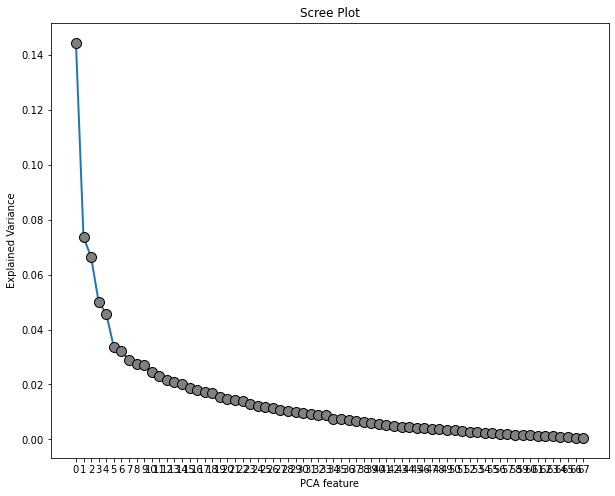

In [13]:
#Running full scree plot on all questions
# calling the scree_plot function
scree_plot(pca_object = pca)

## Psychographic Question Analysis 

In [14]:
#Splitting and analyzing scree plot on personality test
personality_5 = personality_scaled.iloc[:, 0:53]

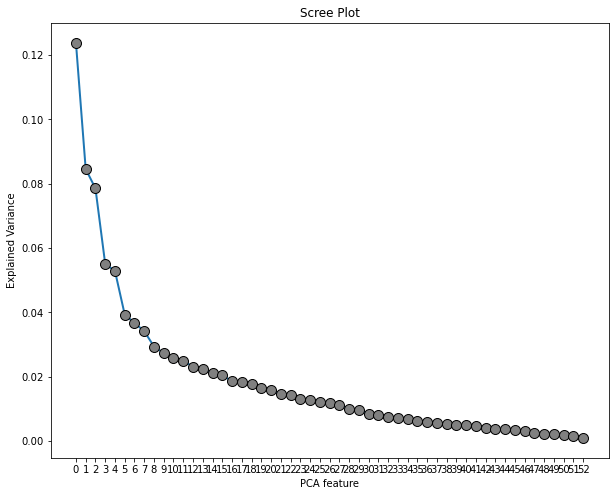

In [15]:
#PCA object with no principal components for BIG 5
big5_pca = PCA(n_components = None,
                random_state = 802)

#Fitting and transforming
personality_5_pca = big5_pca.fit_transform(personality_5)

#Calling scree plot function
scree_plot(pca_object = big5_pca)

Re-create the PCA with 5 components based on the previous scree plot. We try to focus on where the variances are stabilizing.

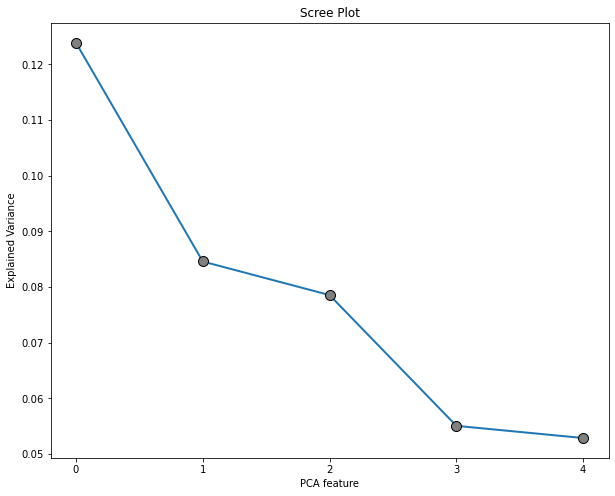

In [16]:
#Narrowing down the PCA for Psych Questions
pca_5 = PCA(n_components = 5,
            random_state = 802)

#Fitting and Transforming 
personality_pca_5 = pca_5.fit_transform(personality_5)

#Calling the scree_plot function
scree_plot(pca_object = pca_5)

5 plots before steadying off

### Factor Loading for Psychographic Questions 

In [17]:
# Max PC Model for Psych questions

# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(pd.np.transpose(big5_pca.components_))

# naming rows as original features
factor_loadings = factor_loadings.set_index(personality_5.columns)

##################
### 5 PC Model ###
##################

# transposing pca components (pc = 5)
factor_loadings_5 = pd.DataFrame(pd.np.transpose(pca_5.components_))

# naming rows as original features
factor_loadings_5 = factor_loadings_5.set_index(personality_5.columns)

<ipython-input-17-91c5126557e6>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings = pd.DataFrame(pd.np.transpose(big5_pca.components_))
<ipython-input-17-91c5126557e6>:14: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings_5 = pd.DataFrame(pd.np.transpose(pca_5.components_))


The personas we created are “unconcerned”, “emotional”, “social butterfly”,” logical” and “workaholic” for the psychographic questions in the survey. Our personas are created based on the Big Five personality traits: Extraversion, agreeableness, conscientiousness, neuroticism and openness.

In [18]:
# naming each principal component
factor_loadings_5.columns = ['unconcerned', 
                             'emotional',        
                             'social butterfly', 
                             'logical',
                             'workaholic'] 

In [19]:
#saving psych question factor loadings to excel
factor_loadings_5.to_excel('psych_factor_5.xlsx')

In [20]:
# converting into a DataFrame 
personality_pca_5 = pd.DataFrame(personality_pca_5)

# renaming columns
personality_pca_5.columns = factor_loadings_5.columns

In [21]:
#checking percentage of persona type
len(personality_pca_5['unconcerned'][personality_pca_5['unconcerned'] > 1.0]) / \
len(personality_pca_5)

0.3277310924369748

Percentage of questions answered
(code above rune for every persona type)
- unconcerned: 0.328
- emotional: 0.361
- social butterfly: 0.328
- logical: 0.286
- workaholic: 0.269

### Clustering Psychographic Personas 

In [22]:
# analyzing factor strengths per survey
big5_pca_reduced = pca_5.transform(personality_5)

# converting to a DataFrame
big5_pca_df = pd.DataFrame(big5_pca_reduced)

# renaming columns
big5_pca_df.columns = factor_loadings_5.columns

In [23]:
#Scaling the big5 df again for cluster analysis
scaler = StandardScaler()

scaler.fit(big5_pca_df)

X_scaled_pca = scaler.transform(big5_pca_df)

big5_scaled_pca = pd.DataFrame(X_scaled_pca)

# reattaching column names
big5_scaled_pca.columns = ['unconcerned',
                           'emotional','social butterfly', 
                           'logical','workaholic']  

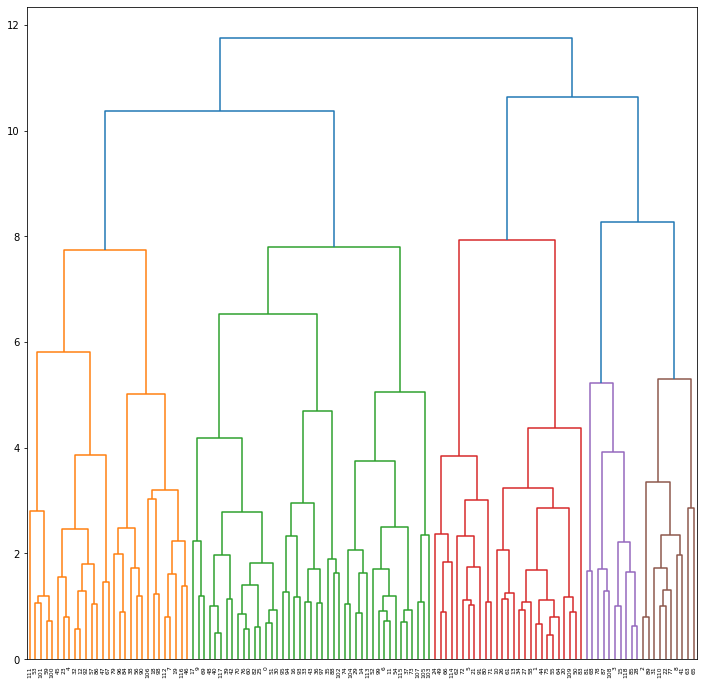

In [24]:
#creating dendrogram of 5 personas in our dataset
# grouping data based on Ward distance
standard_mergings_ward = linkage(y                = big5_scaled_pca,
                                 method           = 'ward',
                                 optimal_ordering = True)

# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z              = standard_mergings_ward,
           leaf_rotation  = 90,
           leaf_font_size = 6)


# saving and displaying the plot
plt.savefig('./big5_dendrogram.png')
plt.show()

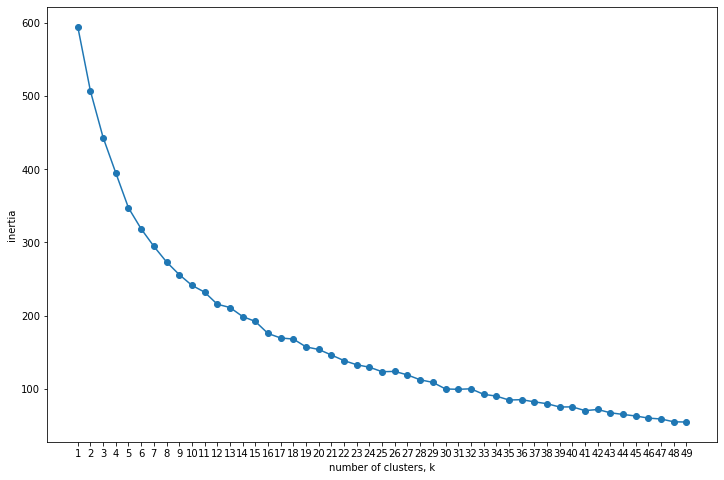

In [25]:
#inertia plot to confirm clustering
inertia_plot(data = big5_scaled_pca)

In [26]:
# K-Means with 5 Clusters
big5_k_pca = KMeans(n_clusters   = 5,
                    random_state = 219)

# fitting the object to the data
big5_k_pca.fit(big5_scaled_pca)


# converting the clusters to a DataFrame
big5_kmeans_pca = pd.DataFrame({'cluster': big5_k_pca.labels_})


# checking the results
print(big5_kmeans_pca.iloc[: , 0].value_counts())

2    33
1    30
4    22
3    22
0    12
Name: cluster, dtype: int64


In [27]:
# storing cluster centers for big5 
big5_centroids_pca = big5_k_pca.cluster_centers_

# converting cluster centers into a DF
big5_centroids_pca_df = pd.DataFrame(big5_centroids_pca)

# renaming columns
big5_centroids_pca_df.columns = ['unconcerned',
                                 'emotional',
                                 'social butterfly', 
                                 'logical','workaholic'] 

In [28]:
# concatenating cluster memberships with principal components
big5_clst_pca_df = pd.concat([big5_kmeans_pca,
                         big5_pca_df],
                         axis = 1)

# checking results
big5_clst_pca_df

# concatenating demographic information with pca-clusters
final_big5_clust_df = pd.concat([categorical_df.iloc[ : , : ],
                                 big5_clst_pca_df],axis = 1)

In [29]:
#dropping out the NaN
big5_cluster_df = final_big5_clust_df.dropna()

In [30]:
#save clean df
big5_cluster_df.to_excel('big5_cluster_clean.xlsx', index = False)

### Psychographic Persona Boxplots 

In [31]:
# renaming regions
cluster_names = {0 : 'cluster 1',
                 1 : 'cluster 2', 
                 2 : 'cluster 3', 
                 3 : 'cluster 4',
                 4 : 'cluster 5'} 

big5_cluster_df['cluster'].replace(cluster_names, inplace = True)

# adding a productivity step
data_df = big5_cluster_df

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


### Psychographic Persona Insights

We decided to compare the psychographic personas we created to what laptop they currently own, to better understand the individuals of the data.

When "Age" is compared against what laptop these individuals have, we can see that each cluster differs greatly. In the plot we can also see that there are larger ranges of age in the clusters that prefer Windows laptops over MacBooks. The only cluster that has large whiskers is cluster 4 and having an equal range of ages between both brands. Whereas clusters 2 and 3 differentiates what laptop the individual owns. Both clusters are almost insignificant on the boxplot for MacBooks. This also infer that Apple may not necessarily be targeting individuals based on age in those clusters.

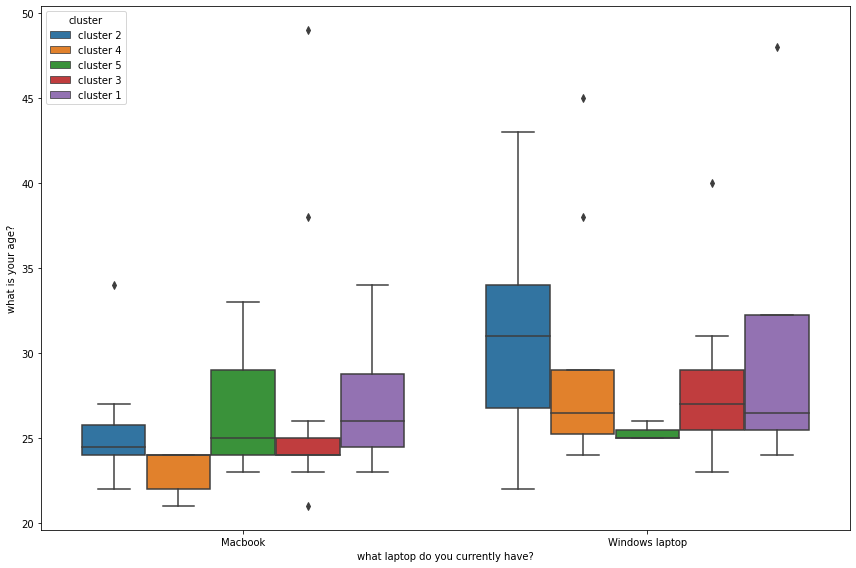

In [32]:
# Current Laptop - Age
########################

####unconcerned
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'what laptop do you currently have?',
            y = 'what is your age?',
            hue = 'cluster',
            data = data_df)

plt.tight_layout()
plt.show()

When comparing these psychographic personas with categorical variable of individuals’ current laptop, regardless of persona of the individual there is no real significance between what brand they prefer. This is evident in the “logical” and “workaholic” plots where the median line of those clusters almost match.Also, despite their psychographic personality types, there is a very low degree of willingness to switch to Chromebook among Hult students. <br>

When it comes to comparing clusters considering students’ generation, Apple should be aware that cluster 4 in Gen X seems to be the most open generation to try out new brands. <br>

The only customer segment that considers Windows purchase in the future is the one representing “workaholic” type among our 5 big personality types, regardless of their clusters. This is why Apple should consider more niche campaign targeting for people who are identified as “workaholics”. 

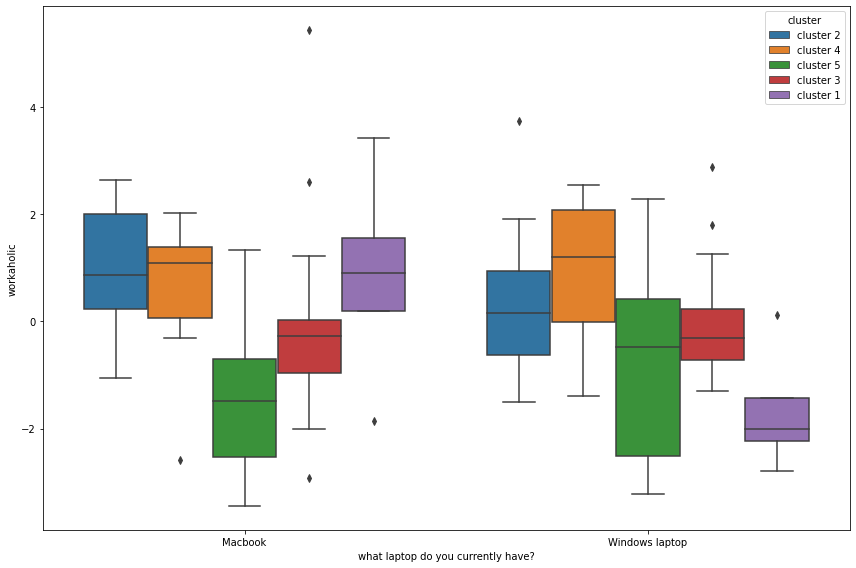

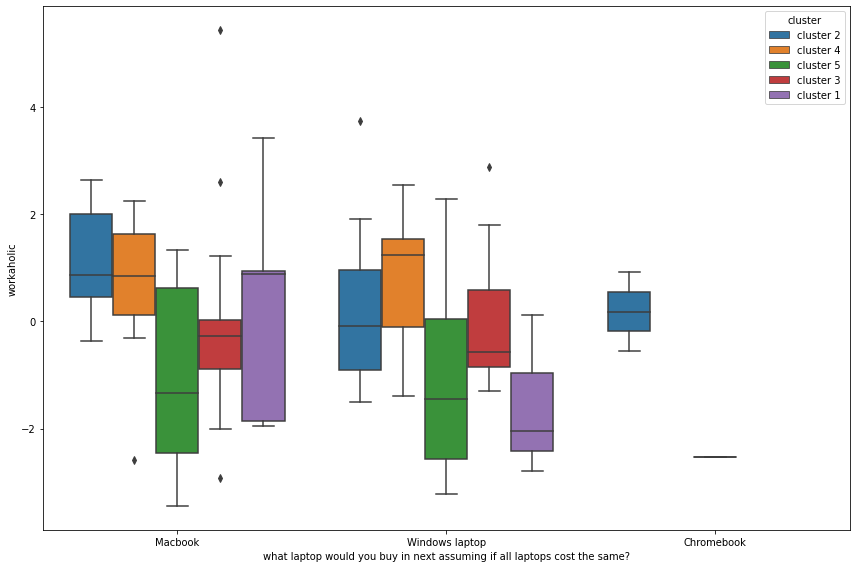

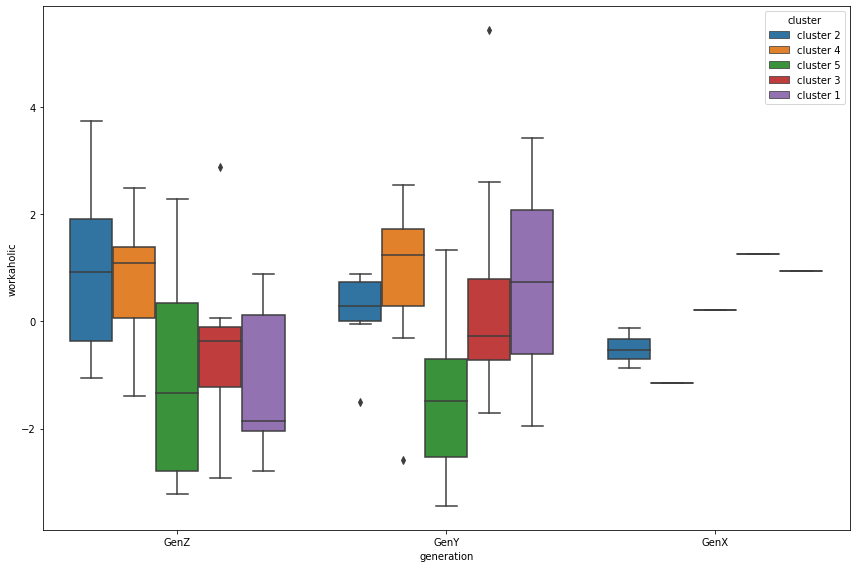

In [33]:
# Workaholic
###Laptop Now
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'what laptop do you currently have?',
            y = 'workaholic',
            hue = 'cluster',
            data = data_df)

plt.tight_layout()
plt.show()

###Laptop Future
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'what laptop would you buy in next assuming if all laptops cost the same?',
            y = 'workaholic',
            hue = 'cluster',
            data = data_df)

plt.tight_layout()
plt.show()

###Generation
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'generation',
            y = 'workaholic',
            hue = 'cluster',
            data = data_df)

plt.tight_layout()
plt.show()



The “logical” student segment shows a very slight indifference for their brand preference. If Apple would like to understand how they can better target this customer segment, it could conduct consumer research or focus group research that will aid in future marketing campaigns to target that customer segment.

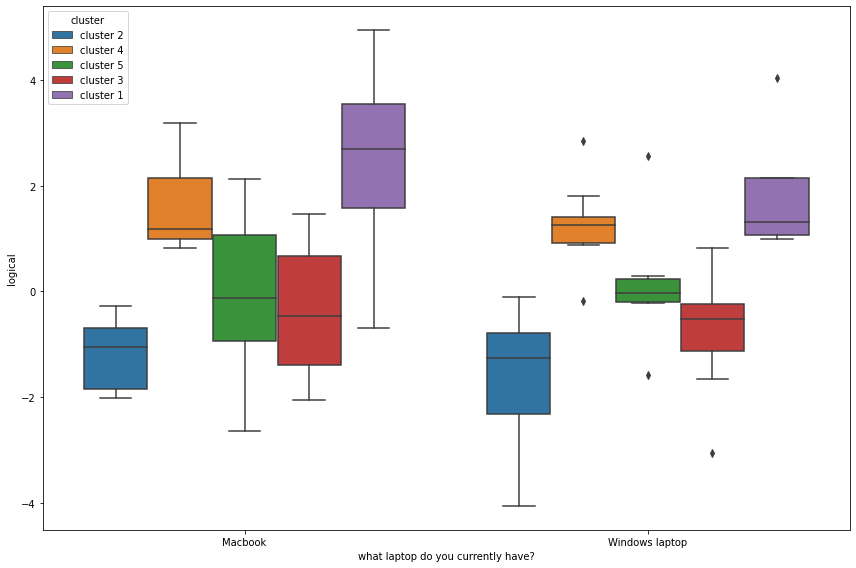

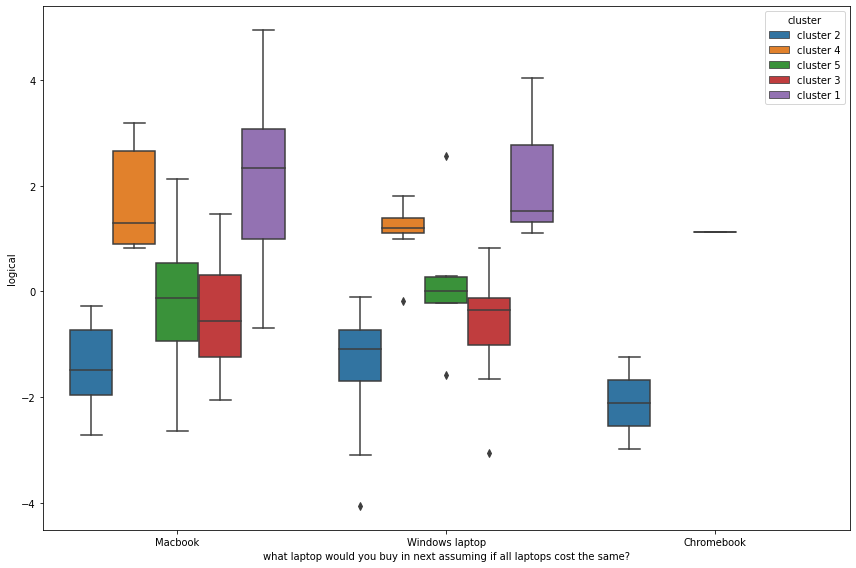

In [34]:
#Logical
###Laptop Now
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'what laptop do you currently have?',
            y = 'logical',
            hue = 'cluster',
            data = data_df)

plt.tight_layout()
plt.show()

###Laptop Future
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'what laptop would you buy in next assuming if all laptops cost the same?',
            y = 'logical',
            hue = 'cluster',
            data = data_df)

plt.tight_layout()
plt.show()


Cluster 1, 3 and 4 show high consistency for “unconcerned” personality types, but MacBook preference shows massive drop in cluster 2 and 5. Apple should focus on understanding the reason for the behavior change specific to these 2 clusters. The reason for this drop might be that MacBook prices are too high for people in clusters 5 and 2.

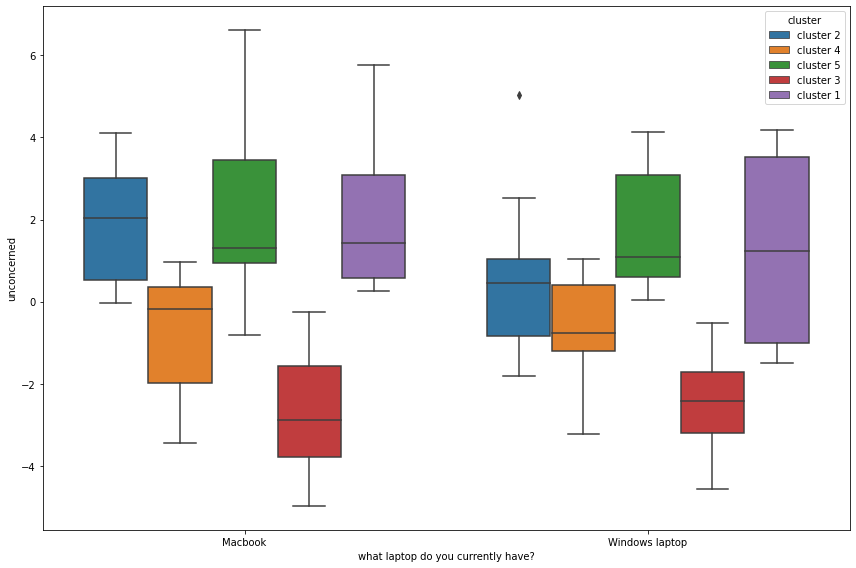

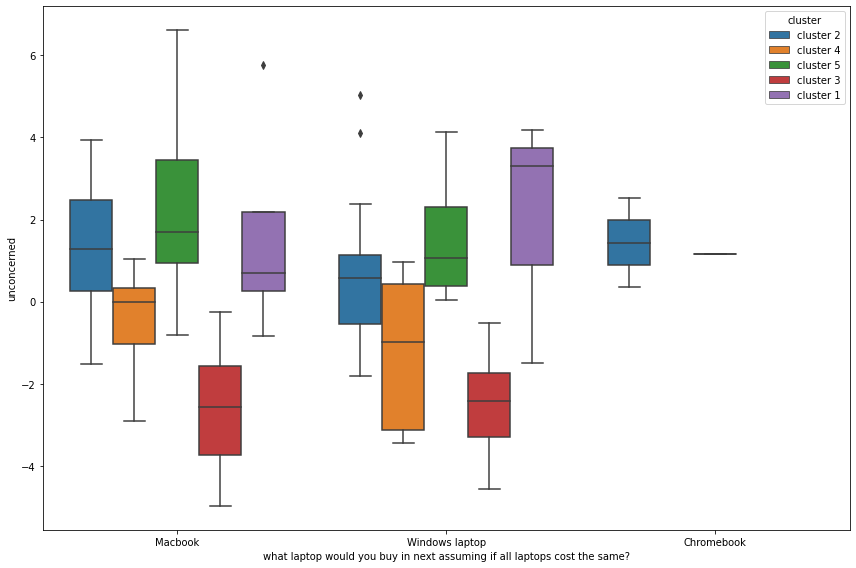

In [35]:
#Unconcerned
###Laptop Now
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'what laptop do you currently have?',
            y = 'unconcerned',
            hue = 'cluster',
            data = data_df)

plt.tight_layout()
plt.show()

###Laptop Future
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'what laptop would you buy in next assuming if all laptops cost the same?',
            y = 'unconcerned',
            hue = 'cluster',
            data = data_df)

plt.tight_layout()
plt.show()

## Hult DNA Analysis 

Slicing 

In [36]:
#Splitting for Hult
hult_dna = personality_scaled.iloc[ : ,53:68]

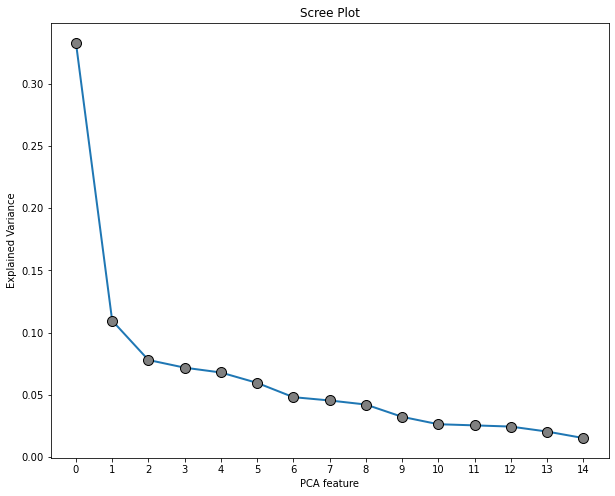

In [37]:
#PCA object with no limit for hult analysis
hult_dna_pca = PCA(n_components = None, random_state = 802)

#Fitting and transforming
hult_pca = hult_dna_pca.fit_transform(hult_dna)

#Calling scree plot function
scree_plot(pca_object = hult_dna_pca)

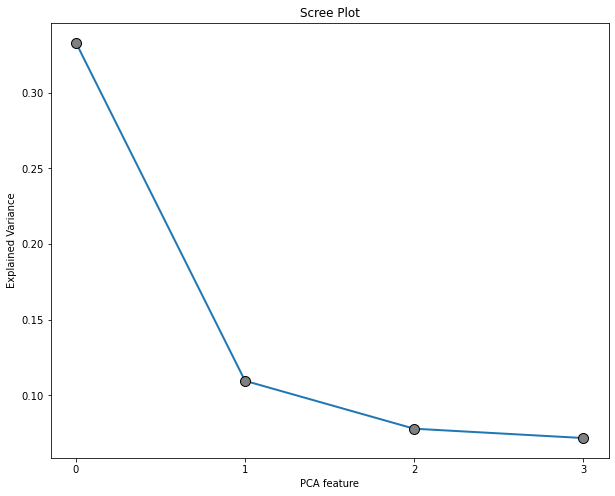

In [38]:
#PCA for HULT DNA with less plots to see clustering
pca_4 = PCA(n_components = 4,
            random_state = 802)

#Fitting and Transforming 
hult_pca_4 = pca_4.fit_transform(hult_dna)

#Calling the scree_plot function
scree_plot(pca_object = pca_4)

4 points before steadying off

### Factor Loading for Hult DNA

In [39]:
#Max PC Model for HULT DNA

# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(pd.np.transpose(hult_dna_pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(hult_dna.columns)


##################
### 3 PC Model ###
##################
# transposing pca components (pc = 3)
factor_loadings_4 = pd.DataFrame(pd.np.transpose(pca_4.components_))

# naming rows as original features
factor_loadings_4 = factor_loadings_4.set_index(hult_dna.columns)

<ipython-input-39-f5841c3cb677>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings = pd.DataFrame(pd.np.transpose(hult_dna_pca.components_))
<ipython-input-39-f5841c3cb677>:15: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings_4 = pd.DataFrame(pd.np.transpose(pca_4.components_))


The personas we created are “lazy”, “campaigner”, “bossy leader”,”team player" for Hult DNA questions in the survey. Our personas are created based on following traits: Thinking, Team and Communication.

In [40]:
# naming each principal component
factor_loadings_4.columns = ['lazy',
                             'campaigner',
                             'bossy leader',
                             'team player']

In [41]:
#To excel for HULT DNA
factor_loadings_4.to_excel('hultdna_factor_4.xlsx')

In [42]:
# converting into a DataFrame 
hult_pca_4 = pd.DataFrame(hult_pca_4)


# renaming columns
hult_pca_4.columns = factor_loadings_4.columns

In [43]:
#checking percentage of persona type
len(hult_pca_4['lazy'][hult_pca_4['lazy'] < -1.0]) / \
len(hult_pca_4)

0.29411764705882354

Percentage of questions answered
(code above rune for every persona type)
- lazy: 0.294
- campaigner: 0.185
- bossy leader: 0.143
- team player: 0.168


In [44]:
# analyzing factor strengths per survey
hult_pca_reduced = pca_4.transform(hult_dna)

# converting to a DataFrame
hult_pca_df = pd.DataFrame(hult_pca_reduced)

# renaming columns
hult_pca_df.columns = factor_loadings_4.columns

### Clustering Analysis of Hult DNA

In [45]:
#Scaling the hult pca again for cluster analysis
scaler = StandardScaler()

scaler.fit(hult_pca_df)

Y_scaled_pca = scaler.transform(hult_pca_df)

hult_scaled_pca = pd.DataFrame(Y_scaled_pca)

# reattaching column names
hult_scaled_pca.columns = ['lazy',
                           'campaigner',
                           'bossy leader',
                           'team player'] 

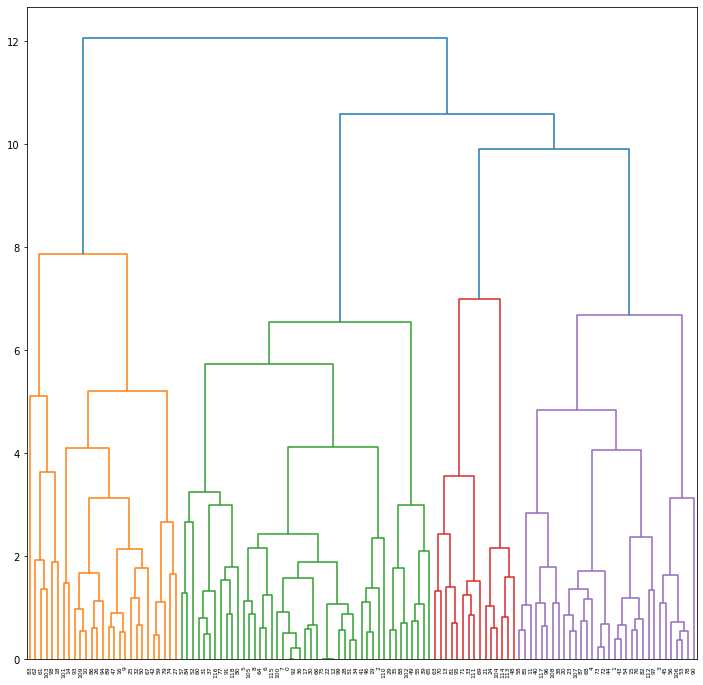

In [46]:
#hult dendrogram
# grouping data based on Ward distance
standard_mergings_ward = linkage(y                = hult_scaled_pca,
                                 method           = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot
plt.savefig('./hult_dendrogram.png')
plt.show()

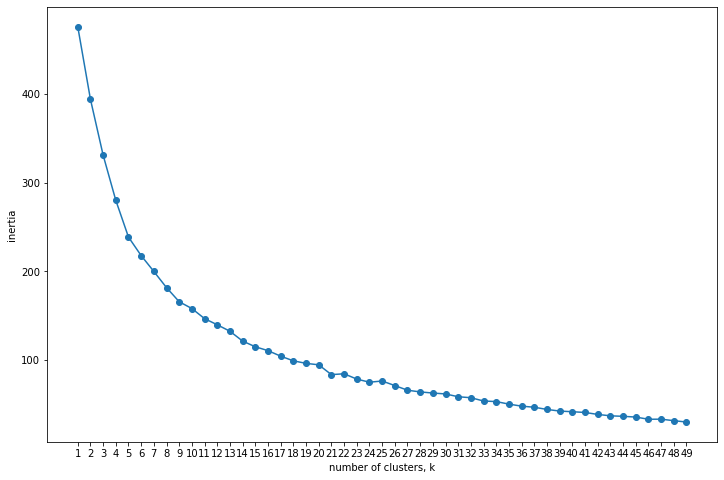

In [47]:
#inertia plot to confirm clustering of hult DNA
inertia_plot(data = hult_scaled_pca)

In [48]:
# K-Means with 4 Hult Clusters
hult_k_pca = KMeans(n_clusters   = 4,
                    random_state = 219)

hult_k_pca.fit(hult_scaled_pca)

hult_kmeans_pca = pd.DataFrame({'cluster': hult_k_pca.labels_})

# checking the results
print(hult_kmeans_pca.iloc[: , 0].value_counts())

3    42
1    28
2    26
0    23
Name: cluster, dtype: int64


In [49]:
# storing cluster centers
hult_centroids_pca = hult_k_pca.cluster_centers_

# converting cluster centers into a DF
hult_centroids_pca_df = pd.DataFrame(hult_centroids_pca)

# renaming columns
hult_centroids_pca_df.columns = ['lazy',
                                 'campaigner',
                                 'bossy leader',
                                 'team player'] 

# checking results (clusters = rows, pc = columns)
hult_centroids_pca_df.round(2)

,lazy,campaigner,bossy leader,team player
0,0.07,0.99,0.08,1.17
1,1.13,-0.17,0.31,-0.63
2,-0.47,0.49,-1.03,-0.70
3,-0.50,-0.73,0.39,0.21


In [50]:
# concatenating cluster memberships with principal components
hult_clst_pca_df = pd.concat([hult_kmeans_pca,
                         hult_pca_df],
                         axis = 1)

# checking results
hult_clst_pca_df

# concatenating demographic information with pca-clusters
final_hult_clust_df = pd.concat([categorical_df.iloc[ : , : ],
                                 hult_clst_pca_df],axis = 1)

In [51]:
#dropping out the NaN
hult_cluster_df = final_hult_clust_df.dropna()

In [52]:
#save clean df
hult_cluster_df.to_excel('hult_cluster_clean.xlsx', index = False)

### Hult DNA Boxplots 

In [53]:
# renaming regions
cluster_names = {0 : 'cluster 1',
                 1 : 'cluster 2',
                 2 : 'cluster 3',
                 3 : 'cluster 4'}

hult_cluster_df['cluster'].replace(cluster_names, inplace = True)

# adding a productivity step
data_df_h = hult_cluster_df


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In terms of comparing current laptop brands, “lazy” and “campaigner” personas showed an equal split in the boxplot, which means that they don’t care whether they own a MacBook or Windows computer. 

“Bossy leader” personas on the other hand were more skewed towards Windows computers, meaning that we can assume that Windows user are more task oriented and focused on getting their work done. 

When we see the boxplot for “team player”, they are more skewed towards MacBook, which could be interpreted as seeing MacBook users as more creative and collaborative. This would be a target audience for Apple to narrow down on when strategizing over new marketing campaigns to gain new customers.

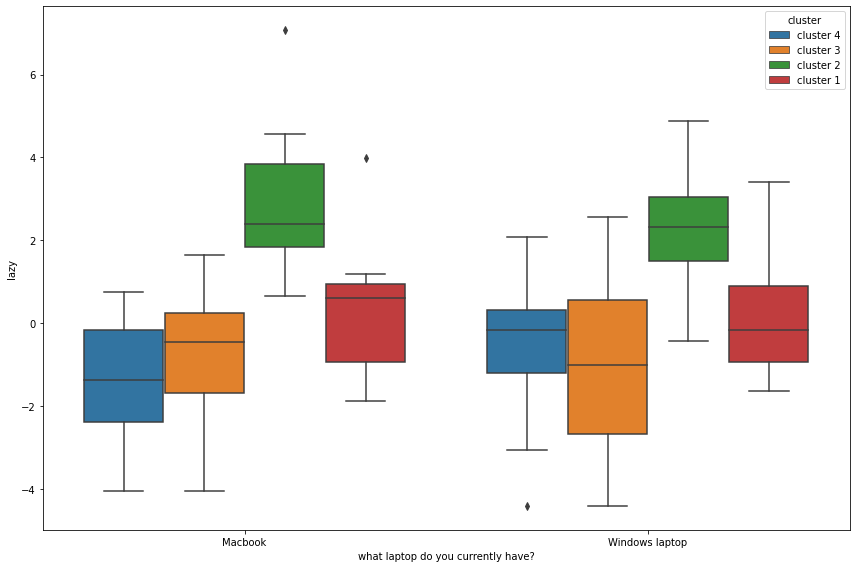

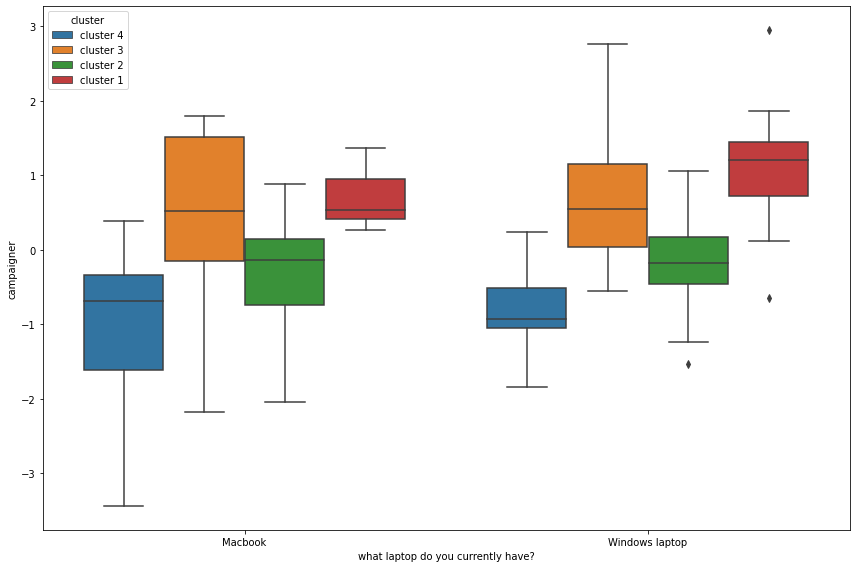

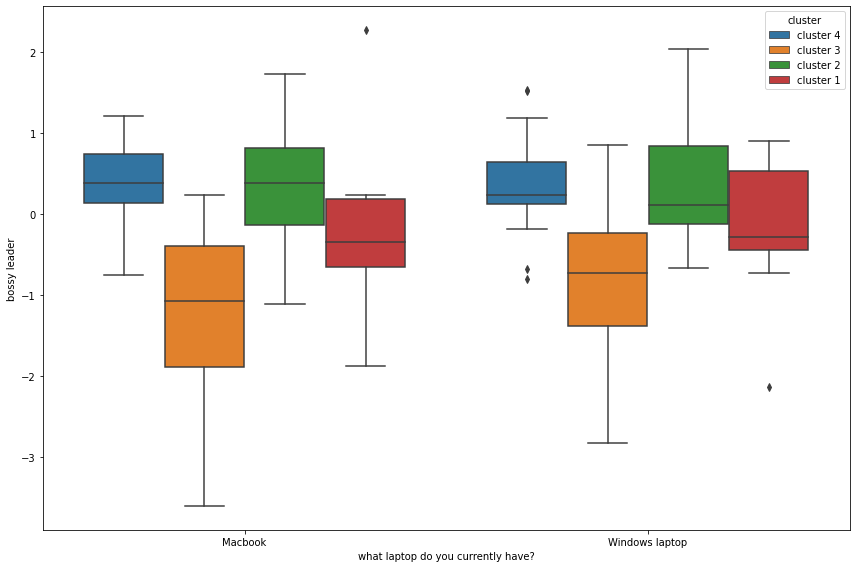

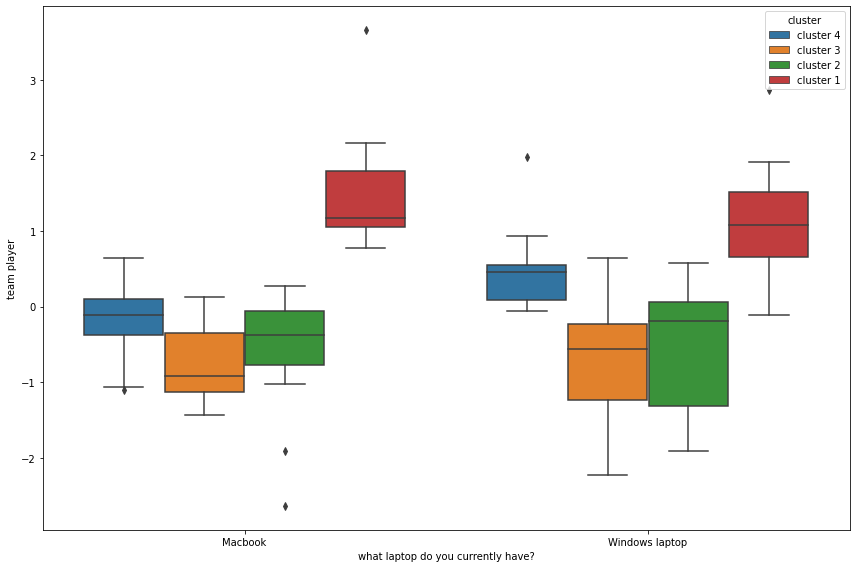

In [54]:
# Current Laptop - Hult DNA
########################

####lazy
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'what laptop do you currently have?',
            y = 'lazy',
            hue = 'cluster',
            data = data_df_h)

plt.tight_layout()
plt.show()

####campaigner
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'what laptop do you currently have?',
            y = 'campaigner',
            hue = 'cluster',
            data = data_df_h)

plt.tight_layout()
plt.show()

####bossy leader
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'what laptop do you currently have?',
            y = 'bossy leader',
            hue = 'cluster',
            data = data_df_h)

plt.tight_layout()
plt.show()

####team player
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'what laptop do you currently have?',
            y = 'team player',
            hue = 'cluster',
            data = data_df_h)

plt.tight_layout()
plt.show()


When looking at the boxplot we can see that “lazy” and “campaigner” personas in both Gen Y and Gen Z tend to not prefer one over the other. 

The visible difference is between the “bossy leader” and “team player” personas. We can see that consumers are more inclined to choose MacBook over Windows, especially Gen Z consumers, if both computers were priced the same. This could be a great opportunity for Apple to create a computer that is a little less expensive but still has the design features of their other models, just like they do for their iPhones. This will not only increase sales within the Gen Z target market, but it would also ensure that these consumers will be a great target audience for cross selling promo

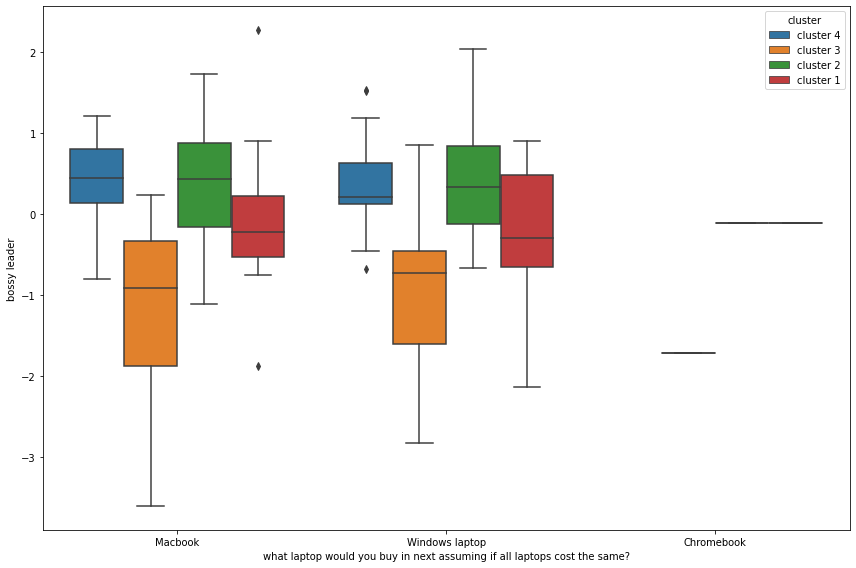

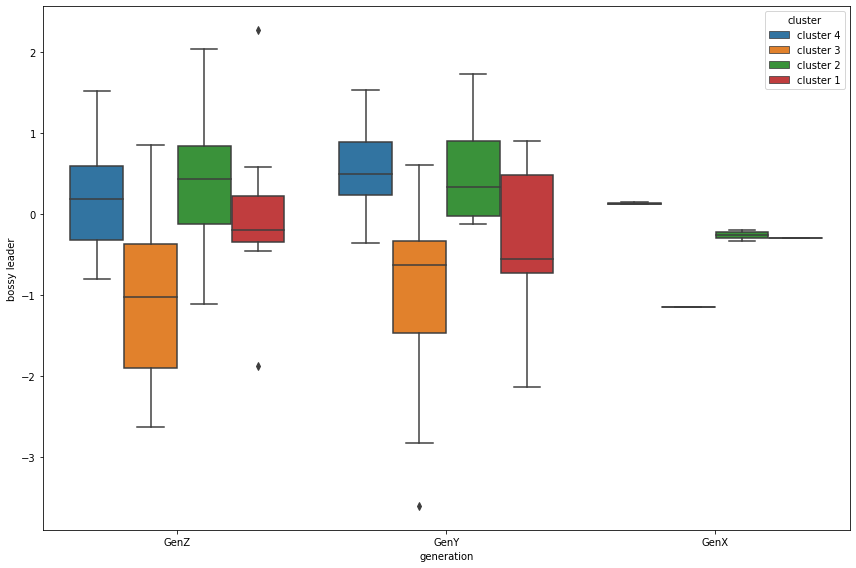

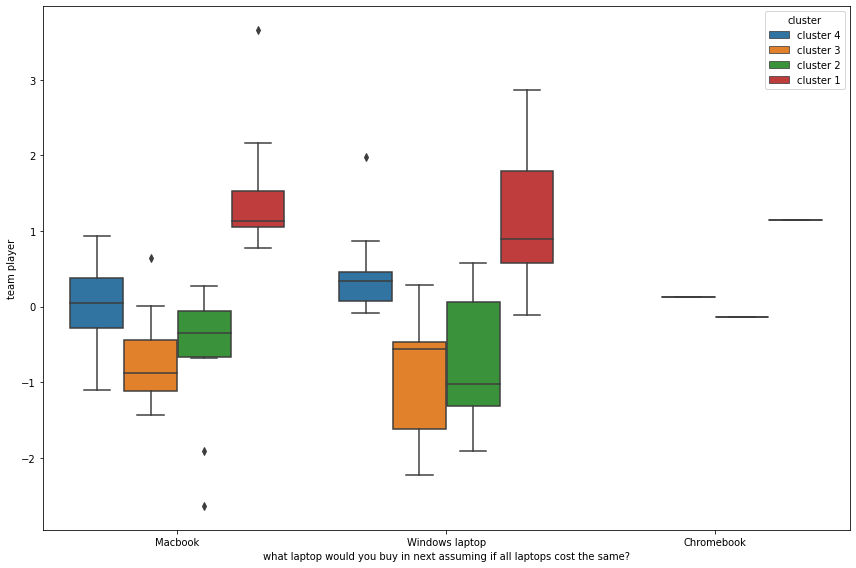

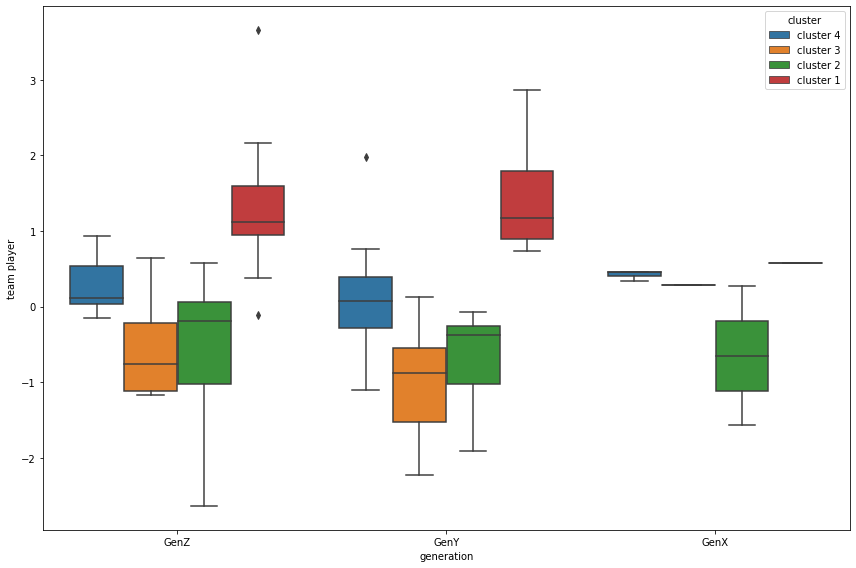

In [55]:
# comparison of generation and future laptop for hult DNA
########################

# ####lazy 
# fig, ax = plt.subplots(figsize = (12, 8))
# sns.boxplot(x = 'what laptop would you buy in next assuming if all laptops cost the same?',
#             y = 'lazy',
#             hue = 'cluster',
#             data = data_df_h)

# plt.tight_layout()
# plt.show()

# #### lazy generation
# fig, ax = plt.subplots(figsize = (12, 8))
# sns.boxplot(x = 'generation',
#             y = 'lazy',
#             hue = 'cluster',
#             data = data_df_h)

# plt.tight_layout()
# plt.show()


# ####campaigner
# fig, ax = plt.subplots(figsize = (12, 8))
# sns.boxplot(x = 'what laptop would you buy in next assuming if all laptops cost the same?',
#             y = 'campaigner',
#             hue = 'cluster',
#             data = data_df_h)

# plt.tight_layout()
# plt.show()

# ####campaigner generation
# fig, ax = plt.subplots(figsize = (12, 8))
# sns.boxplot(x = 'generation',
#             y = 'campaigner',
#             hue = 'cluster',
#             data = data_df_h)

# plt.tight_layout()
# plt.show()


####bossy leader
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'what laptop would you buy in next assuming if all laptops cost the same?',
            y = 'bossy leader',
            hue = 'cluster',
            data = data_df_h)

plt.tight_layout()
plt.show()

####bossy leader generation
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'generation',
            y = 'bossy leader',
            hue = 'cluster',
            data = data_df_h)

plt.tight_layout()
plt.show()

####team player 
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'what laptop would you buy in next assuming if all laptops cost the same?',
            y = 'team player',
            hue = 'cluster',
            data = data_df_h)

plt.tight_layout()
plt.show()

####team player generation
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'generation',
            y = 'team player',
            hue = 'cluster',
            data = data_df_h)

plt.tight_layout()
plt.show()



## Conclusion 

After exploring and analyzing the data to learn more about laptop preferences, we can see how significant the effects of Big Five personality traits and Hult DNA groupings define purchasing preferences. Even though there seems to be an even split for students currently either using a MacBook or Window computer, we can see moderate differences for future purchasing preferences depending on students’ personality traits. While students who identify more as “unconcerned” under the Big Five personality traits wouldn’t care much to purchase a MacBook in the future, students that fall under the “emotional” and “social butterfly” umbrella would rather choose to purchase a MacBook. The generational clustering for Gen Z students that identify more as “emotional” and “social butterfly” is also larger compared to Gen X and Gen Y students, meaning that Apple should be targeting consumers around the ages of 21 to 25 because this target audience will be more inclined to buy their product. By targeting them with ads that are heartwarming but also showcase that you can enjoy your time with friends and family, Apple will be able to increase its sales of MacBooks within the Gen Z demographic.

Students that identify more as “lazy” or “campaigner” under the Hult DNA personality trait should not be Apple’s primary target audience, because there is more of an even split between MacBook and Windows computer when it comes to future purchasing preference. To convince these two groups of students to buy a MacBook might increase the company’s advertising spending because it would have to put in more effort to gain new customers. Students who identify more as “team players” would be the ideal target audience for Apple because this group has larger clusters compared to Window computers. What is also interesting to mention is that both Gen Y and Gen Z have a large clustering for “team player” personality traits. That means that Apple has a target audience that ranges between the ages of 21 to 36 that could very likely buy their new computers.

Cross selling efforts and spending would be very low for not only this audience, but also when targeting the “emotional” and “social butterfly” consumers because they’ll be more inclined to buy into new products once they’re part of the “Apple Universe”. The simplicity of being able to sync all your devices and being able to easily share things with friends and family is a huge strength that Apple can use to not only increase sales of its products, but also its market share.